# ## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import copy

# ## 2. Data Loading and Initial Exploration

In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# ## 3. Data Preprocessing

In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])

df = df.drop('customerID', axis=1)

# Convert binary categorical features (Yes/No) to 1/0
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].map({'Yes': 1, 'No': 0})

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Identify remaining categorical columns for One-Hot Encoding
# Exclude already numerical or binary-encoded columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = [col for col in df.columns if col not in numerical_cols and col != 'Churn']
# Apply One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [5]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


# ## 4. Data Splitting and Scaling

In [6]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [7]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_valid:", X_val.shape)
print("Shape of y_valid:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4218, 30)
Shape of y_train: (4218,)
Shape of X_valid: (1407, 30)
Shape of y_valid: (1407,)
Shape of X_test: (1407, 30)
Shape of y_test: (1407,)


# Transpose data for the neural network (features x samples)

In [8]:
X_train = X_train.T
X_val = X_val.T
X_test = X_test.T
y_train = y_train.values.reshape(1, -1)
y_val = y_val.values.reshape(1, -1)
y_test = y_test.values.reshape(1, -1)

In [9]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_valid:", X_val.shape)
print("Shape of y_valid:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (30, 4218)
Shape of y_train: (1, 4218)
Shape of X_valid: (30, 1407)
Shape of y_valid: (1, 1407)
Shape of X_test: (30, 1407)
Shape of y_test: (1, 1407)


# ## 5. Neural Network Implementation (from Scratch)
# Includes functions for:
# - Parameter initialization
# - Forward propagation (linear, activation, L-layer)
# - Cost computation (with L2 regularization)
# - Backward propagation (linear, activation, L-layer)
# - Parameter updates (Adam optimizer)
# - Prediction

# --- Helper Functions ---

In [10]:
def initialize_parametrs(layer_dims):
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * np.sqrt(2. / layer_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters
#-------
def linear_activation_forward(A_prev, W, b, activation, keep_prob=1.0):
    Z = np.dot(W, A_prev) + b

    if activation == 'relu':
        A = np.maximum(0, Z)
        D = np.random.rand(A.shape[0], A.shape[1])
        D = (D < keep_prob).astype(int) # Create mask
        A = A * D # Apply mask
        A = A / keep_prob # Inverted dropout
        cache = (A_prev, W, b, Z, D)
    elif activation == 'sigmoid':
        A = 1 / (1 + np.exp(-Z))
        cache = (A_prev, W, b, Z, None) # No dropout on sigmoid

    return A, cache
#-------
def L_model_forward(X, parameters, keep_prob=1.0):
    caches = []
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], 'relu', keep_prob)
        caches.append(cache)
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], 'sigmoid')
    caches.append(cache)
    return AL, caches
#-------
def compute_cost(AL, Y, parameters=None, lambd=0):
    m = Y.shape[1]
    epsilon = 1e-8
    cross_entropy_cost = -np.mean(Y * np.log(AL + epsilon) + (1 - Y) * np.log(1 - AL + epsilon))

    L2_regularization_cost = 0
    if parameters is not None and lambd != 0:
        L = len(parameters) // 2
        for l in range(1, L + 1):
            W = parameters["W" + str(l)]
            L2_regularization_cost += np.sum(np.square(W))
        L2_regularization_cost = (lambd / (2 * m)) * L2_regularization_cost

    cost = cross_entropy_cost + L2_regularization_cost
    return np.squeeze(cost)

#-------
def linear_activation_backward(dA, cache, activation, lambd=0, keep_prob=1.0):
    A_prev, W, b, Z, D = cache
    m = A_prev.shape[1]

    if activation == 'relu':
        dZ = dA * (Z > 0)
        if D is not None:
            dZ *= D
            dZ /= keep_prob
    elif activation == 'sigmoid':
        s = 1 / (1 + np.exp(-Z))
        dZ = dA * s * (1 - s)

    dW = (1/m) * np.dot(dZ, A_prev.T) + (lambd/m) * W
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)

    return dA_prev, dW, db
#-------
def L_model_backward(AL, Y, caches, lambd=0, keep_prob=1.0):
    grads = {}
    L = len(caches)
    Y = Y.reshape(AL.shape)

    dAL = - (np.divide(Y, AL + + 1e-8) - np.divide(1 - Y, 1 - AL + 1e-8))

    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation="sigmoid", lambd=lambd)

    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(
            grads["dA" + str(l + 2)], current_cache, activation="relu", lambd=lambd, keep_prob=keep_prob
        )
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads
#--------
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate=0.01,
                             beta1=0.9, beta2=0.999, epsilon=1e-8):
    L = len(parameters) // 2
    v_corrected = {}
    s_corrected = {}

    t_adjusted = max(t, 1)

    for l in range(1, L + 1):
        v["dW" + str(l)] = beta1 * v["dW" + str(l)] + (1 - beta1) * grads["dW" + str(l)]
        v["db" + str(l)] = beta1 * v["db" + str(l)] + (1 - beta1) * grads["db" + str(l)]

        v_corrected["dW" + str(l)] = v["dW" + str(l)] / (1 - beta1**t_adjusted)
        v_corrected["db" + str(l)] = v["db" + str(l)] / (1 - beta1**t_adjusted)

        s["dW" + str(l)] = beta2 * s["dW" + str(l)] + (1 - beta2) * (grads["dW" + str(l)]**2)
        s["db" + str(l)] = beta2 * s["db" + str(l)] + (1 - beta2) * (grads["db" + str(l)]**2)

        s_corrected["dW" + str(l)] = s["dW" + str(l)] / (1 - beta2**t_adjusted)
        s_corrected["db" + str(l)] = s["db" + str(l)] / (1 - beta2**t_adjusted)

        parameters["W" + str(l)] -= learning_rate * v_corrected["dW" + str(l)] / (np.sqrt(s_corrected["dW" + str(l)]) + epsilon)
        parameters["b" + str(l)] -= learning_rate * v_corrected["db" + str(l)] / (np.sqrt(s_corrected["db" + str(l)]) + epsilon)

    return parameters, v, s

# --- Main Training Function ---


In [11]:
def L_layer_model(X_train, Y_train, X_val, Y_val, layers_dims, learning_rate,
                  num_iterations, print_cost, beta1=0.9, beta2=0.999, epsilon=1e-8, lambd=0, keep_prob=1.0):
    np.random.seed(1)
    train_costs = []
    valid_costs = []
    parameters = initialize_parametrs(layers_dims)
    v = {}
    s = {}
    L = len(parameters) // 2

    for l in range(1, L + 1):
        v["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        v["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])
        s["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        s["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])

    for i in range(num_iterations):
        # Forward propagation
        AL_train, caches = L_model_forward(X_train, parameters, keep_prob=keep_prob)

        # Compute cost
        train_cost = compute_cost(AL_train, Y_train, parameters=parameters, lambd=lambd)

        # Backward propagation
        grads = L_model_backward(AL_train, Y_train, caches, lambd = lambd, keep_prob=keep_prob)

        # Update parameters
        parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, i+1,
                                                     learning_rate, beta1, beta2, epsilon)

        # Store training cost
        train_costs.append(train_cost)

        # Compute cost on the validation set
        AL_valid, _ = L_model_forward(X_val, parameters, keep_prob=keep_prob)
        J_valid = compute_cost(AL_valid, Y_val, parameters=parameters, lambd=lambd)
        valid_costs.append(J_valid)

        if print_cost and i % 100 == 0:
            print(f"Epoch {i}:")
            print(f"  Training Cost: {train_cost:.4f}")
            print(f"  Validation Cost: {J_valid:.4f}")
    return parameters, train_costs, valid_costs

In [ ]:
parameters, train_costs, valid_costs = L_layer_model(
    X_train,
    y_train,
    X_val,
    y_val,
    [30, 16, 1],
    learning_rate=0.01,
    lambd=0.01,
    keep_prob=0.9,
    num_iterations=500,
    print_cost=True
)

Epoch 0:
  Training Cost: 1.1222
  Validation Cost: 0.9405
Epoch 100:
  Training Cost: 0.4064
  Validation Cost: 0.4287
Epoch 200:
  Training Cost: 0.3992
  Validation Cost: 0.4314
Epoch 300:
  Training Cost: 0.3902
  Validation Cost: 0.4311
Epoch 400:
  Training Cost: 0.3863
  Validation Cost: 0.4312


# ## 6. Cost Visualization

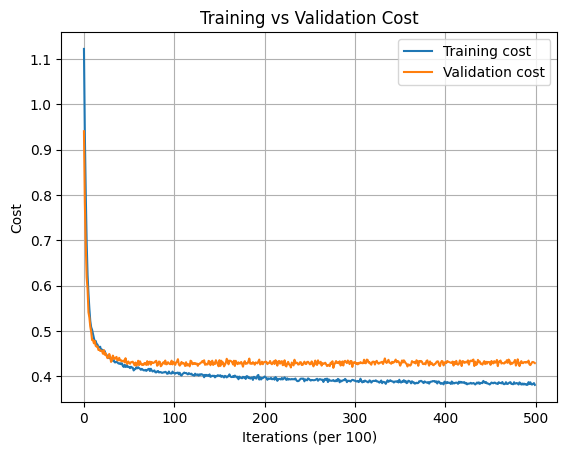

In [13]:
plt.plot(train_costs, label='Training cost')
plt.plot(valid_costs, label='Validation cost')
plt.xlabel('Iterations (per 100)')
plt.ylabel('Cost')
plt.title('Training vs Validation Cost')
plt.legend()
plt.grid(True)
plt.show()

# ## 7. Model Evaluation

In [14]:
def predict(X, parameters):
    AL, _ = L_model_forward(X, parameters)
    predictions = (AL > 0.5).astype(int)
    return predictions

In [15]:
y_pred_train = predict(X_train, parameters)
y_pred_val = predict(X_val, parameters)
y_pred_test = predict(X_test, parameters)

print(f"Train Accuracy: {np.mean(y_pred_train == y_train) * 100:.2f}%")
print(f"Validation Accuracy: {np.mean(y_pred_val == y_val) * 100:.2f}%")
print(f"Test Accuracy: {np.mean(y_pred_test == y_test) * 100:.2f}%")

Train Accuracy: 82.41%
Validation Accuracy: 79.96%
Test Accuracy: 79.25%



Confusion Matrix (Test Set):
[[928 105]
 [187 187]]


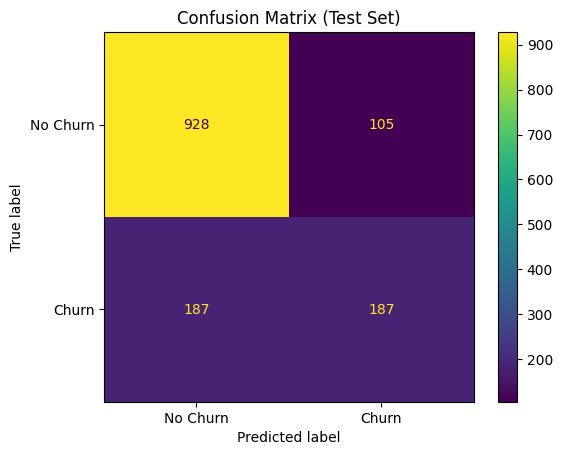


Classification Report (Test Set):
              precision    recall  f1-score   support

No Churn (0)       0.83      0.90      0.86      1033
   Churn (1)       0.64      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [16]:
y_test_1d = y_test.ravel()
y_pred_test_1d = y_pred_test.ravel()

print("\nConfusion Matrix (Test Set):")
cm = confusion_matrix(y_test_1d, y_pred_test_1d)
print(cm)

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Churn", "Churn"])
disp.plot()
plt.title("Confusion Matrix (Test Set)")
plt.show()

print("\nClassification Report (Test Set):")
print(classification_report(y_test_1d, y_pred_test_1d, target_names=["No Churn (0)", "Churn (1)"]))